# Проект: Статистический анализ данных

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.

Сервисом можно пользоваться:

без подписки:
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra:
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

Описание данных

В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — users_go.csv

Поездки — rides_go.csv

Подписки — subscriptions_go.csv


**Цель исследования**

Проанализировать данные сервиса аренды самокатов GoFast и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
- Выяснить, какую выручку приносят компании клиенты с подпиской и без;
- Выяснить, какое оптимальное время тратят клиенты на определенные расстояния и насколько этоь зависит от наличия подписки.


**Ход исследования**

Данные о поездках и стоимостях я получу из трех файлов:

/datasets/users_go.csv

/datasets/rides_go.csv

/datasets/subscriptions_go.csv

О качестве данных ничего не известно, поэтому я проведу поиск явных дубликатов, пропусков и аномалий в орфорграфии. Далее, я добавлю столбец с номером месяца.
После, я опишу и визуализирую общую информацию о пользователях и поездках.
Так же, я создам 4 датафрейма с различными данными из ранее выгруженных файлов и приступлю к анализу новых таблиц.
После анализа данных, приступим к проверке гипотез.

Таким образом, исследование пройдет в 6 этапов:
- Загрузка данных
- Предобработка данных
- Исследовательский анализ данных
- Объединение данных
- Подсчёт выручки
- Проверка гипотез

In [1]:
# Импортируем все необходимые для проекта библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from scipy.stats import binom
import matplotlib.pyplot as plt

### Шаг 1. Загрузка данных

#### Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы. Пути к файлам:

In [2]:
#Загрузим все файлы
users_go = pd.read_csv('/datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

#### Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

*Рассмотрим данные таблицы по отдельности для удобства*

In [3]:
#Выгрузим первую строку из таблицы о пользователях
users_go.head(1)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra


In [4]:
#Изучим общую информацию о файле и проверим на наличие дубликатов
users_go.info()
users_go.duplicated().sum()
users_go.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


31

In [5]:
#Выгрузим первую строку из таблицы о поездках
rides_go.head(1)

,user_id,distance,duration,date
0,1,4409.91914,25.599769,2021-01-01


In [6]:
#Изучим общую информацию о файле и проверим на наличие дубликатов
rides_go.info()
rides_go.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


0

In [7]:
#Выгрузим первую строку из таблицы о подписках
subscriptions_go.head(1)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0


In [8]:
#Изучим общую информацию о файле и проверим на наличие дубликатов
subscriptions_go.info()
subscriptions_go.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


0

**Промежуточный вывод:**

Во всех трех таблицах отсутствуют пропуски. В таблице с пользователями обнаружено 31 явных дубликатов. Аномалий в данных по оформлению не обнаружено. В столбцах со временем обнаружены некорректный тип данных.

### Шаг 2. Предобработка данных

#### Приведите столбец date к типу даты pandas.

In [9]:
#Приведем даты к формату год/месяц/дата
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')
rides_go['date'].head(10)

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
5   2021-10-09
6   2021-10-19
7   2021-11-06
8   2021-11-14
9   2021-11-22
Name: date, dtype: datetime64[ns]

#### Создайте новый столбец с номером месяца на основе столбца date.

In [10]:
rides_go['month'] = rides_go['date'].dt.month
rides_go['month'].head()

0    1
1    1
2    4
3    8
4    8
Name: month, dtype: int64

In [11]:
print('Минимальная дата :', rides_go['date'].min())
print('Максимальная дата:', rides_go['date'].max())

Минимальная дата : 2021-01-01 00:00:00
Максимальная дата: 2021-12-30 00:00:00


#### Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

In [12]:
#Как мы выяснили ранее, в таблице с пользователями обнаружено 31 явных дубликатов. Изменим их и проверим изменения
users_go.drop_duplicates(inplace=True)
users_go.duplicated().sum()

0

**Промежуточный вывод**

Согласно общей информаци, пропуски в таблицах не обнаружены. Изменен тип даты, добавлен столбец по месяцам, а так же, удалены явные дубликаты из таблицы с пользователями.

### Шаг 3. Исследовательский анализ данных

*Опишите и визуализируйте общую информацию о пользователях и поездках:*

#### Частота встречаемости городов;

In [13]:
users_go['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

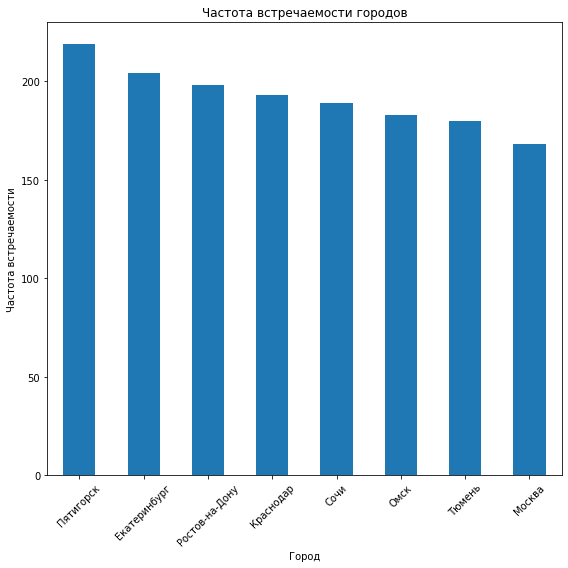

In [14]:
users_go['city'].value_counts().plot(   
    kind='bar', 
    figsize=(8, 8),     
    xlabel='Город', 
    ylabel='Частота встречаемости',    
    title='Частота встречаемости городов',
    rot=45)
plt.tight_layout() 
plt.show()

**Предварительный вывод**

Представленность в городах распределена почти равномерно. Больше всего представлены самокаты в Пятегорске, 14%, а наименьшая представленность в Москве, 11%, что может обуславливаться большой разницей в неселении города.

#### Соотношение пользователей с подпиской и без подписки;

In [15]:
users_go['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

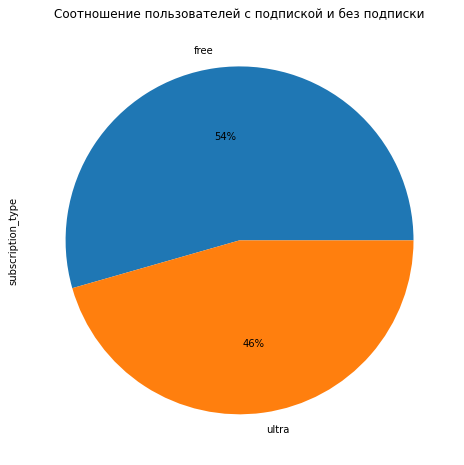

In [16]:
users_go['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = users_go['subscription_type'],
    autopct = '%1.0f%%',
    figsize=(8,8), 
    title = 'Соотношение пользователей с подпиской и без подписки');

**Предварительный вывод**

Число клиентов с подпиской и без так же, почти равны, но все же клиентов без подписок 54%, по сравнению с 46% с подписками.


#### Возраст пользователей;

In [17]:
users_go['age'].value_counts().head(10)

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
Name: age, dtype: int64

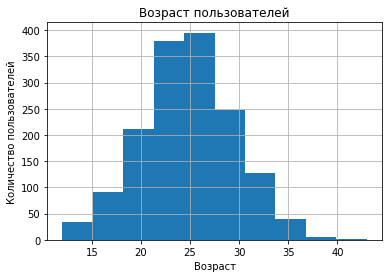

In [18]:
#В данном разборе круговая диаграмма не подойдет из за слишком большого количества значений. Построем гистограмму
plt.hist(users_go['age'])
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

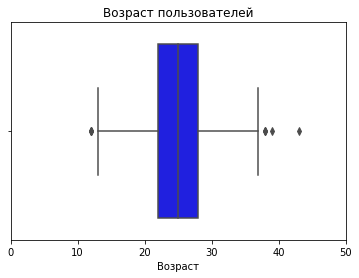

In [19]:
sns.boxplot(x=users_go['age'], color='blue')
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
_ = plt.xlim(0, 50)

**Предварительный вывод**

Большая часть пользователей - это люди, возрастом от 22 до 27 лет. Можно предположить, что студенты. Далее, с увеличением возраста, количество уменьшается, что предполагает уже наличие капитала и потребности к более комфортному передвижению, например на авто.


#### Расстояние, которое пользователь преодолел за одну поездку;

In [20]:
rides_go['distance'].value_counts().head(10)

741.545359     1
4158.226381    1
3672.118870    1
4533.004089    1
2437.274120    1
3053.957201    1
3283.984975    1
3746.984964    1
3336.681167    1
2536.902564    1
Name: distance, dtype: int64

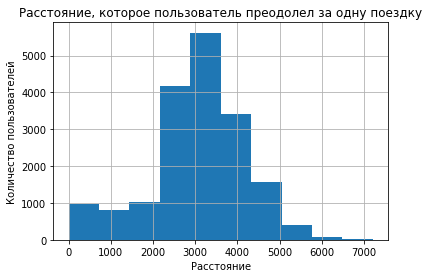

In [21]:
#В данном разборе круговая диаграмма не подойдет из за слишком большого количества значений. Построем гистограмму
plt.hist(rides_go['distance'])
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

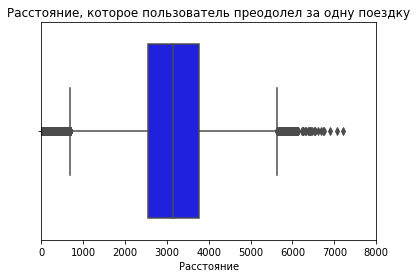

In [22]:
sns.boxplot(x=rides_go['distance'], color='blue')
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние')
_ = plt.xlim(0, 8000)

**Предварительный вывод**

Больше всего пользователей активируют самокат для поездки на расстояние от 3км до 3,5км, что подтверждает статистика о времени пользования: чаще всего, поездки длятся 17-22мин. (если взять среднюю скорость 15км/ч с учетом светофоров и переходов, то как раз получается проехать за 20мин около 3км)

#### Продолжительность поездок.

In [23]:
rides_go['duration'].value_counts().head(10)

0.500000     95
22.184080     1
25.866000     1
22.837062     1
19.173800     1
20.250429     1
24.551830     1
17.798679     1
8.525481      1
20.769748     1
Name: duration, dtype: int64

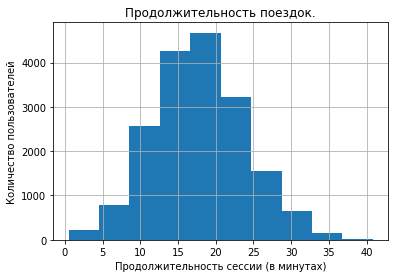

In [24]:
#В данном разборе круговая диаграмма не подойдет из за слишком большого количества значений. Построем гистограмму
plt.hist(rides_go['duration'])
plt.title('Продолжительность поездок.')
plt.xlabel('Продолжительность сессии (в минутах)')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

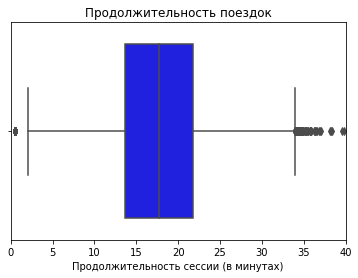

In [25]:
sns.boxplot(x=rides_go['duration'], color='blue')
plt.title('Продолжительность поездок')
plt.xlabel('Продолжительность сессии (в минутах)')
_ = plt.xlim(0, 40)

**Вывод по разделу**

Представленность в городах распределена почти равномерно. Больше всего представлены самокаты в Пятегорске, 14%, а наименьшая представленность в Москве, 11%, что может обуславливаться большой разницей в неселении города.

Число клиентов с подпиской и без так же, почти равны, но все же клиентов без подписок 54%,  по сравнению с 46% с подписками.

Большая часть пользователей - это люди, возрастом от 22 до 27 лет. Можно предположить, что студенты. Далее, с увеличением возраста, количество уменьшается, что предполагает уже наличие капитала и потребности к более комфортному передвижению, например на авто.

Больше всего пользователей активируют самокат для поездки на расстояние от 3км до 3,5км, что подтверждает статистика о времени пользования: чаще всего, поездки длятся 17-22мин. (если взять среднюю скорость 15км/ч с учетом светофоров и переходов, то как раз получается проехать за 20мин около 3км)





### Шаг 4. Объединение данных

#### Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [26]:
#Проверяем размеры датасетов
print(rides_go['user_id'].count())
print(users_go['user_id'].count())

18068
1534


In [27]:
#Объединяем первые две таблицы по id,  а потом по типу подписки
total_go = users_go.merge(rides_go, on='user_id').merge(subscriptions_go, on='subscription_type')
total_go

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [28]:
#Проверяем размеры датасетов после объединения
print(rides_go['user_id'].count())
print(total_go['user_id'].count())

18068
18068


#### Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:

##### C данными о пользователях без подписки;

In [29]:
# Датафрейм данных с пользователями с подпиской
ultra_go = total_go.loc[total_go['subscription_type'] == 'ultra']
ultra_go.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


##### C данными о пользователях c подпиской;

In [30]:
# Датафрейм данных с пользователями с  без подписки
free_go = total_go.loc[total_go['subscription_type'] == 'free']
ultra_go.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


#### Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

In [31]:
#Основные данные пользователей без подписки
free_go['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

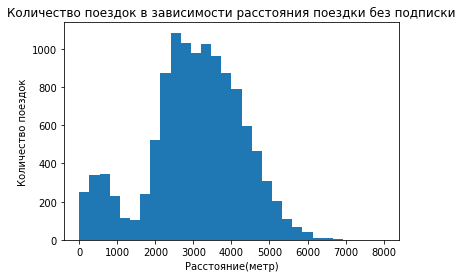

In [32]:
#Построим гистограмму для наглядности поездок без подписки
plt.hist(free_go['distance'], bins=30, range=(0,8000), label=['free'])
plt.title('Количество поездок в зависимости расстояния поездки без подписки')
plt.xlabel('Расстояние(метр)')
plt.ylabel('Количество поездок')
plt.show()

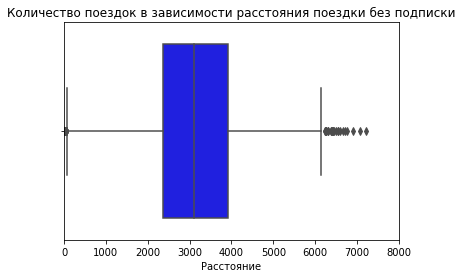

In [33]:
#Построим ящик с усами (boxplot)
sns.boxplot(x=free_go['distance'], color='blue')
plt.title('Количество поездок в зависимости расстояния поездки без подписки')
plt.xlabel('Расстояние')
_ = plt.xlim(0, 8000)

**Предварительный вывод**

Расстояние поездок без подписки варьируется от 0 до 7211м. График показывает гистограмму распределения данных. Вид гистограммы указывает на то, что распределение данных приближено к нормальному распределению. Диапазон данных варьируется от примерно 0м до 6000м, что можно увидеть на нижнем графике (boxplot). Все данные выше 6000м, считаем выбросами(аномалиями).

In [34]:
#Основные данные пользователей с подпиской
ultra_go['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

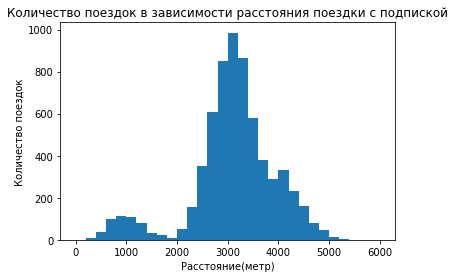

In [35]:
#Построим гистограмму для наглядности поездок c подпиской
plt.hist(ultra_go['distance'], bins=30, range=(0,6000), label=['ultra'])
plt.title('Количество поездок в зависимости расстояния поездки c подпиской')
plt.xlabel('Расстояние(метр)')
plt.ylabel('Количество поездок')
plt.show()

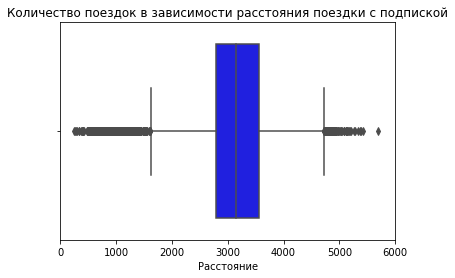

In [36]:
#Построим ящик с усами (boxplot)
sns.boxplot(x=ultra_go['distance'], color='blue')
plt.title('Количество поездок в зависимости расстояния поездки с подпиской')
plt.xlabel('Расстояние')
_ = plt.xlim(0, 6000)

**Предварительный вывод**

Расстояние поездок без подписки варьируется от 244 до 5700м. Гистограмма показывает, что данные имеют распределение, похожее на нормальное распределение, с явной центральной вершиной и симметричным спадом по обе стороны от центра. Диапазон данных варьируется от примерно 1500м до 3700м, что можно увидеть на нижнем графике (boxplot). Все данные за приделами "усов", считаем выбросами(аномалиями).

In [37]:
#Основные данные пользователей по времени поездки без подписки
free_go['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

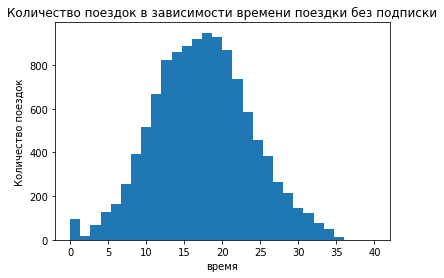

In [38]:
#Построим гистограмму для наглядности поездок по времени без подписки
plt.hist(free_go['duration'], bins=30, range=(0,40), label=['free'])
plt.title('Количество поездок в зависимости времени поездки без подписки')
plt.xlabel('время')
plt.ylabel('Количество поездок')
plt.show()

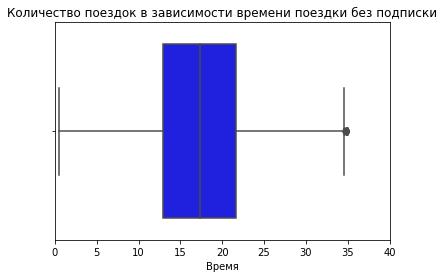

In [39]:
#Построим ящик с усами (boxplot)
sns.boxplot(x=free_go['duration'], color='blue')
plt.title('Количество поездок в зависимости времени поездки без подписки')
plt.xlabel('Время')
_ = plt.xlim(0, 40)

**Предварительный вывод**

Время поездок без подписки варьируется от 0 до 35мин. Гистограмма в верхней части изображения показывает, что данные имеют примерно нормальное распределение, с более высокой частотой данных в средней части и снижающейся частотой к краям. Бокс-диаграмма в нижней части изображения показывает несколько точек за пределами усов, указывающих на наличие выбросов. Выбросы наблюдаются по крайней мере за пределами 35 на оси значений, что подтверждает наличие аномалий в данных.

In [40]:
#Основные данные пользователей по времени поездки с подпиской
ultra_go['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

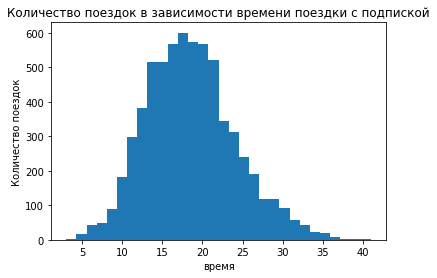

In [41]:
#Построим гистограмму для наглядности поездок по времени с подпиской
plt.hist(ultra_go['duration'], bins=30, range=(3,41), label=['free'])
plt.title('Количество поездок в зависимости времени поездки с подпиской')
plt.xlabel('время')
plt.ylabel('Количество поездок')
plt.show()

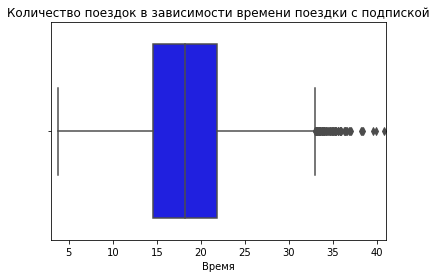

In [42]:
#Построим ящик с усами (boxplot)
sns.boxplot(x=ultra_go['duration'], color='blue')
plt.title('Количество поездок в зависимости времени поездки с подпиской')
plt.xlabel('Время')
_ = plt.xlim(3, 41)

**Предварительный вывод**

Время поездок с подпиской варьируется от 3 до 41мин. Гистограмма в верхней части изображения показывает, что данные имеют примерно нормальное распределение, с более высокой частотой данных в средней части и снижающейся частотой к краям. Бокс-диаграмма в нижней части изображения показывает множество точек за пределами усов, указывающих на наличие выбросов. Выбросы наблюдаются по крайней мере за пределами 32мин. на оси значений, что подтверждает наличие аномалий в данных.

**Вывод по разделу**

При рассмотрении гистограмм, можно сделать вывод, что клиенты без подписки совершают заезды на меньшее расстояние, что так же дает меньшее время пользования. Предположительно, клиенты с подпиской понимают, что поездка будет экономнее и можно проехать по-больше. В данных о расстоянии и времени поездок для пользователей обеих категорий наблюдаются аномалии на каждом этапе анализа.

### Шаг 5. Подсчёт выручки

#### Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [43]:
#Создадим новый датафрейм из обих данных, в котором будут столбцы с расстоянием, поездками, временем и пользователями
total_go['duration'] = np.ceil(total_go['duration'])
total_amount_data = total_go.groupby(['user_id', 'month']).agg({
    'distance': 'sum',
    'user_id': 'count',
    'duration': 'sum',
    'minute_price': 'sum',
    'start_ride_price': 'sum',
    'subscription_fee': 'sum',
    'subscription_type': 'first',}).rename(columns={'user_id': 'count'}).reset_index()

#Так как цена за старт, за минуту поездки и сам абонемент не меняется от количества поездок, то необходимо отредактировать данные
total_amount_data['start_ride_price'] = total_amount_data['start_ride_price'] / total_amount_data['count']
total_amount_data['minute_price'] = total_amount_data['minute_price'] / total_amount_data['count']
total_amount_data['subscription_fee'] = total_amount_data['subscription_fee'] / total_amount_data['count']

total_amount_data

,user_id,month,distance,count,duration,minute_price,start_ride_price,subscription_fee,subscription_type
0,1,1,7027.511294,2,42.0,6.0,0.0,199.0,ultra
1,1,4,754.159807,1,7.0,6.0,0.0,199.0,ultra
2,1,8,6723.470560,2,46.0,6.0,0.0,199.0,ultra
3,1,10,5809.911100,2,32.0,6.0,0.0,199.0,ultra
4,1,11,7003.499363,3,56.0,6.0,0.0,199.0,ultra
...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,2,26.0,8.0,50.0,0.0,free
11327,1534,8,7622.453034,2,48.0,8.0,50.0,0.0,free
11328,1534,9,4928.173852,1,23.0,8.0,50.0,0.0,free
11329,1534,11,13350.015305,4,78.0,8.0,50.0,0.0,free


In [44]:
#Проверим на наличие пропусков и дубликатов новую таблицу
total_amount_data.drop_duplicates(inplace=True)
total_amount_data.duplicated().sum()

0

#### В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

In [45]:
#Добавляем столбец с выручкой
total_amount_data['gain'] = (total_amount_data['start_ride_price']*total_amount_data['count']+
                             total_amount_data['minute_price']*total_amount_data['duration']+
                             total_amount_data['subscription_fee'])
total_amount_data['gain'] = total_amount_data['gain'].astype(int)
total_amount_data

,user_id,month,distance,count,duration,minute_price,start_ride_price,subscription_fee,subscription_type,gain
0,1,1,7027.511294,2,42.0,6.0,0.0,199.0,ultra,451
1,1,4,754.159807,1,7.0,6.0,0.0,199.0,ultra,241
2,1,8,6723.470560,2,46.0,6.0,0.0,199.0,ultra,475
3,1,10,5809.911100,2,32.0,6.0,0.0,199.0,ultra,391
4,1,11,7003.499363,3,56.0,6.0,0.0,199.0,ultra,535
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,2,26.0,8.0,50.0,0.0,free,308
11327,1534,8,7622.453034,2,48.0,8.0,50.0,0.0,free,484
11328,1534,9,4928.173852,1,23.0,8.0,50.0,0.0,free,234
11329,1534,11,13350.015305,4,78.0,8.0,50.0,0.0,free,824


In [46]:
#Посчитаем общую выручку
total_amount_data['gain'].sum()

3878641

### Шаг 6. Проверка гипотез

*Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.*

#### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Гипотеза: пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки

Н0: длительность поездки ultra = fee 

Н1: длительность поездки ultra > fee

In [47]:
#Проверим гипотезу
ultra = ultra_go['duration'] 
free = free_go['duration']
results = st.ttest_ind(ultra, free, alternative = 'greater')
alpha = 0.05
results.pvalue

1.2804098316645618e-34

Опровергаем гипотезу Н0: длительность поездки ultra = fee



#### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.


Гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

Н0: среднее расстояние поездки с подпиской ultra = 3130м

Н1: среднее расстояние поездки с подпиской ultra > 3130м

In [48]:
#Проверим гипотезу
ultra_d = ultra_go['distance'] 
distance = 3130
alpha = 0.05
results = st.ttest_1samp(ultra_d, distance, alternative = 'less')
results.pvalue

0.08046311521502146

Не получилось опровергнуть теорию Н0: среднее расстояние поездки с подпиской ultra = 3130м

Проверим одностороннюю гипотезу, что расстояние, которое проезжают пользователи с подпиской не превышает оптимального расстояния в 3130 м.

In [49]:
#Проверим гипотезу H1
ultra_d = ultra_go['distance'] 
distance = 3130
alpha = 0.05
results = st.ttest_1samp(ultra_d, distance, alternative = 'greater')
results.pvalue


0.9195368847849785

Не получилось опровергнуть теорию: среднее расстояние поездки с подпиской ultra не превышает = 3130м

#### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.


Гипотеза:  помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Н0: помесячная выручка от пользователей по месяцам ultra = fee 

Н1:  помесячная выручка от пользователей по месяцам ultra > fee 

In [50]:
#Проверим гипотезу
ultra_gain = total_amount_data.loc[total_amount_data.subscription_type == 'ultra', 'gain']
free_gain = total_amount_data.loc[total_amount_data.subscription_type == 'free', 'gain'] 
alpha = 0.05
results = st.ttest_ind(ultra_gain, free_gain, alternative = 'greater')
results.pvalue


1.8850394384715216e-31

Опровергаем гипотезу Н0:  помесячная выручка от пользователей по месяцам ultra = fee

Можно сделать вывод, что доходы от клиентов с платной подпиской больше, чем от клиентов без подписки.

**Предварительные выводы:**

Гипотеза о том, что длительность поездки ultra = fee была опровергнута, можем предполагать, что средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки.

Гипотеза о том, что среднее расстояние поездки с подпиской ultra = 3130м не была опровергнута.

Гипотеза о том, что помесячная выручка от пользователей по месяцам ultra = fee была опровергнута, можем предполагать, что  помесячная выручка от пользователей с подпиской больше, чем  помесячная выручка от пользователей без подписки.


#### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для проверки гипотезы о снижении количества обращений в техподдержку после обновления серверов можно использовать статистический тест для сравнения двух зависимых выборок. В данном случае необходимt-test для связанных выборок.

Этот тест позволяет сравнить средние значения количества обращений до и после обновления для одних и тех же пользователей. Если данные не распределены нормально, можно применить непараметрический альтернативный тест, например, тест Уилкоксона.

Важно также обратить внимание на то, чтобы данные были собраны корректно и репрезентативно, и чтобы количество обращений было измерено для одной и той же группы пользователей до и после обновления.

Для проверки гипотезы потребуется тест st.ttest_rel(before, after, alternative="less")

Выглядеть гипотеза будет следующим образом:

H0 : μ1 = μ2
H1 : μ1 != μ2

μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

### Выводы по проекту

В проведённом анализе данных о пользователях самокатов выявлено отсутствие пропусков и аномалий в оформлении, однако обнаружены явные дубликаты, которые были успешно удалены. После коррекции типов данных и добавления столбца с месяцами, представительность пользователей в городах оказалась почти равномерной, с наибольшей долей самокатов в Пятигорске (14%) и наименьшей в Москве (11%). Это может быть связано с различиями в населении городов.

Анализ показал, что число клиентов с подпиской и без неё почти одинаково, но доля пользователей без подписки составляет 54%. Большинство пользователей – это молодые люди в возрасте 22-27 лет, что может свидетельствовать о студенческом статусе. С увеличением возраста наблюдается снижение количества пользователей, что может указывать на наличие капитала и предпочтение более комфортных видов передвижения.

Наиболее популярные расстояния для поездок составляют от 3 до 3,5 км, что соответствует среднему времени пользования самокатом от 17 до 22 минут. Пользователи без подписки, как правило, совершают поездки на меньшие расстояния и с меньшей продолжительностью. В то же время, клиенты с подпиской, вероятно, осознают экономическую выгоду и стремятся использовать самокат более активно.

Гипотеза о том, что длительность поездки с подпиской равна стоимости, была опровергнута, что позволяет предположить, что средняя продолжительность поездок с подпиской превышает таковую без неё. Гипотеза о равенстве среднего расстояния поездки с подпиской (3130 м) не была опровергнута, в то время как гипотеза о более высокой помесячной выручке от пользователей с подпиской опроверглась.

Для проверки гипотезы о снижении обращений в техподдержку после обновления серверов рекомендуется использовать t-test для связанных выборок. Этот тест поможет сравнить средние значения обращений до и после обновления для одной и той же группы пользователей, учитывая необходимость корректности и репрезентативности собранных данных. Если данные не распределены нормально, можно применить тест Уилкоксона как альтернативный подход.

Как показало исследование, больше выручки несут клиенты с подпиской. Следовательно, рекомендую провести рекламные акции для клиентов без подписки, например: 50% скидка на первый год.
Так же, предлагаю обнулять стоимость за старт при привышении расстояния в 4км или 40 минут(что выходит за рамки среднего пользования), тем самым, время поездок увеличится и выручка возрастет, возможно выше, чем с подпиской.